<a href="https://www.kaggle.com/madeelbadar/brain-mri?scriptVersionId=89176967" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
import sklearn as sk
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense


**Brain Tumor Detection**

In [2]:
#stepes of image classification
#features and labels
#train test split
#make model
#check model accuracy

In [3]:
no='../input/brain-mri-images-for-brain-tumor-detection/no'
yes='../input/brain-mri-images-for-brain-tumor-detection/yes'


In [4]:
image_size=100
data=[]
label=0 
for img in os.listdir(no):

        img_path=os.path.join(no, img)

        img_arr= cv2.imread(img_path)

        img_arr= cv2.resize(img_arr, dsize=(image_size, image_size))


        data.append([img_arr,label])


label=1 
for img in os.listdir(yes):
        img_path=os.path.join(yes, img)

        img_arr= cv2.imread(img_path)
        
        img_arr= cv2.resize(img_arr, dsize=(image_size, image_size))

        data.append([img_arr,label])

In [5]:
random.shuffle(data)

In [6]:
X=[]
y=[]

In [7]:
for features, labels in data:
    X.append(features)
    y.append(labels)

In [8]:
X=np.array(X)
y=np.array(y)
X=X/255

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [11]:
history=model.fit(X_train,y_train, verbose=1, epochs=4, validation_split=(0.3))

2022-03-03 08:37:56.500435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
4/4 [==============================] - 2s 208ms/step - loss: 0.6129 - accuracy: 0.6585 - val_loss: 0.5743 - val_accuracy: 0.7593
Epoch 2/4
4/4 [==============================] - 0s 113ms/step - loss: 0.8078 - accuracy: 0.6341 - val_loss: 0.7079 - val_accuracy: 0.7037
Epoch 3/4
4/4 [==============================] - 0s 109ms/step - loss: 0.5951 - accuracy: 0.7073 - val_loss: 0.5790 - val_accuracy: 0.7593
Epoch 4/4
4/4 [==============================] - 0s 110ms/step - loss: 0.5229 - accuracy: 0.8049 - val_loss: 0.5800 - val_accuracy: 0.7593


In [12]:
history.history

{'loss': [0.6129226088523865,
  0.8077600002288818,
  0.5950844287872314,
  0.5228878855705261],
 'accuracy': [0.6585366129875183,
  0.6341463327407837,
  0.707317054271698,
  0.8048780560493469],
 'val_loss': [0.5742548108100891,
  0.7079479098320007,
  0.5789815187454224,
  0.5799995064735413],
 'val_accuracy': [0.7592592835426331,
  0.7037037014961243,
  0.7592592835426331,
  0.7592592835426331]}

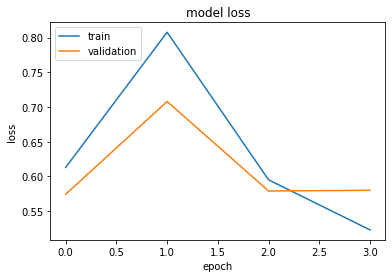

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
results = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 94ms/step - loss: 0.4942 - accuracy: 0.7763


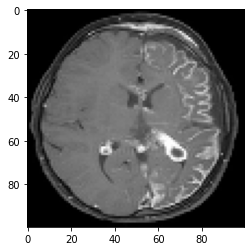

<Figure size 720x720 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X[51])
plt.figure(figsize=(10,10)) 
plt.show()